In [418]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
preexisting_path = "/Users/kristenhanold/Desktop/df_us_filtered.csv"
nonexisting_path = "/Users/kristenhanold/Desktop/nonexisting_us.csv"

# Read the mouse data and the study results
old_preexisting_data = pd.read_csv(preexisting_path)
nonexisting_data = pd.read_csv(nonexisting_path)

In [419]:
# display table containing individuals with pre-existing conditions prior to covid
preexisting_data = old_preexisting_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
preexisting_data.head()

,study_id,redcap_survey_identifier,introduction_timestamp,country,state_in_india,state_in_us,province_in_china,state_other_countries,age,race_and_ethnicity,...,sector_of_contribution___4,sector_of_contribution___5,other,where_helped___1,where_helped___2,where_helped___3,where_helped___4,where_helped___5,other_where_helped,social_contributions_complete
0,59,NaN,2020-06-10 13:42:00,1,NaN,43.0,NaN,NaN,2,1,...,0,0,NaN,0,0,0,0,0,NaN,0
1,62,NaN,2020-06-10 13:48:00,1,NaN,43.0,NaN,NaN,2,1,...,0,0,NaN,0,0,0,0,0,NaN,2
2,63,NaN,2020-06-10 13:50:00,1,NaN,14.0,NaN,NaN,2,1,...,0,0,NaN,0,0,0,0,0,NaN,0
3,64,NaN,2020-06-10 13:56:00,1,NaN,5.0,NaN,NaN,3,5,...,0,0,NaN,0,0,0,0,0,NaN,2
4,67,NaN,2020-06-10 13:59:00,1,NaN,5.0,NaN,NaN,3,1,...,0,0,NaN,0,0,1,0,1,cyclone Amphan relief fund,2


In [420]:
# display table containing individuals with no pre-existing conditions prior to covid
nonexisting_data.head()

,study_id,redcap_survey_identifier,country,state_in_us,age,race_and_ethnicity,sex,gender_other,marital_status,living_with___1,...,sector_of_contribution___3,sector_of_contribution___4,sector_of_contribution___5,other,where_helped___1,where_helped___2,where_helped___3,where_helped___4,where_helped___5,other_where_helped
0,58,NaN,1.0,5.0,2.0,1.0,1.0,NaN,1.0,0,...,0,0,0,NaN,0,0,0,0,0,NaN
1,64,NaN,1.0,5.0,3.0,5.0,0.0,NaN,3.0,1,...,0,0,0,NaN,0,0,0,0,0,NaN
2,74,NaN,1.0,20.0,3.0,1.0,0.0,NaN,3.0,1,...,0,0,0,NaN,0,0,0,0,0,NaN
3,77,NaN,1.0,38.0,2.0,1.0,1.0,NaN,3.0,1,...,0,0,0,NaN,0,0,0,0,0,NaN
4,78,NaN,1.0,5.0,2.0,1.0,1.0,NaN,3.0,1,...,1,0,0,NaN,0,1,1,0,0,NaN


In [448]:
# counting the number of study-id's in the pre-existing conditions dataset
preexisting_count = len(preexisting_data['study_id'].value_counts())
preexisting_count_df = pd.DataFrame({
    'Total Participants with Pre-Existing Conditions': [preexisting_count]})

preexisting_count_df

,Total Participants with Pre-Existing Conditions
0,2252


In [422]:
# counting the number of study-id's in the pre-existing conditions dataset
nonexisting_count = len(nonexisting_data['study_id'].value_counts())
nonexisting_count_df = pd.DataFrame({
    'Total Participants with No Pre-Existing Conditions': [nonexisting_count]})

nonexisting_count_df

,Total Participants with No Pre-Existing Conditions
0,827


In [423]:
# age demographics that had pre-existing conditions prior to covid
age_bins = [1, 2, 3, 4, 5, 6, 7]
group_names = ('18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '> 75')

# Creating a group based off of the bins
age_groups_df = preexisting_data.groupby("age")

total_count_existing = age_groups_df["age"].count()
percent_of_preexisting = round((total_count_existing / preexisting_count)*100, 2).map('{:.2f}%'.format)


preexisting_demographics_df = pd.DataFrame({
    'Total Count': total_count_existing,
    'Percentage of Indivuals with Pre-Existing Conditions': percent_of_preexisting
})

preexisting_demographics_df

######### CHANGE AGE COLUMN TO REFLECT LABEL NAMES############

,Total Count,Percentage of Indivuals with Pre-Existing Conditions
age,,
1,105,4.66%
2,473,21.00%
3,428,19.01%
4,412,18.29%
5,518,23.00%
6,249,11.06%
7,67,2.98%


In [424]:
# age demographics that had no pre-existing conditions prior to covid
age_bins = [1, 2, 3, 4, 5, 6, 7]
group_names = ('18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '> 75')

# Creating a group based off of the bins
age_groups_df = nonexisting_data.groupby("age")

total_count_nonexisting = age_groups_df["age"].count()
percent_of_nonexisting = round((total_count_nonexisting / nonexisting_count)*100, 2).map('{:.2f}%'.format)


nonexisting_demographics_df = pd.DataFrame({
    'Total Count': total_count_nonexisting,
    'Percentage of Indivuals with No Pre-Existing Conditions': percent_of_nonexisting
})

nonexisting_demographics_df

######### CHANGE AGE COLUMN TO REFLECT LABEL NAMES############

,Total Count,Percentage of Indivuals with No Pre-Existing Conditions
age,,
1.0,56,6.77%
2.0,224,27.09%
3.0,165,19.95%
4.0,145,17.53%
5.0,157,18.98%
6.0,65,7.86%
7.0,15,1.81%


In [479]:
############## KEEP GETTING ERRORS. COME BACK TO THIS !!!!!!###############


# gender demographics based on pre-existing conditions

# female_count = 0
# male_count = 0
# other_count = 0
# transgender_count = 0

# # locate only the columns SN and Gender
# gender_df = preexisting_data.iloc[:, [6]]

# for row in gender_df:
#     if row == 0:
#         female_count += 1
#     elif row == 1:
#         male_count += 1
#     elif row == 2:
#         transgender_count += 1
#     elif row == 3:
#         other_count += 1
        
# female_count = 0
# male_count = 0
# other_count = 0
# transgender_count = 0

# # count each gender
# gender_count = gender_df['sex'].value_counts()
# gender_count

# # find percentage of each gender
# female_percent = round((female_count/preexisting_count)*100, 2)
# male_percent = round((male_count/preexisting_count)*100, 2)
# transgender_percent = round((transgender_count/preexisting_count)*100, 2)
# other_percent = round((other_count/preexisting_count)*100, 2)

# # create new data frame for gender analysis
# gender_existing_analysis = pd.DataFrame({
#     'Count Per Gender': [female_count, male_count, transgender_count, other_count],
#     'Percentage of Individuals': [female_percent, male_percent, transgender_percent, other_percent]
# })

# gender_existing_analysis

In [480]:
############## KEEP GETTING ERRORS. COME BACK TO THIS !!!!!!###############


# # gender demographics based for no pre-existing conditions
# female_count = 0
# male_count = 0
# other_count = 0
# transgender_count = 0

# # locate only the columns SN and Gender
# gender_df = nonexisting_data.iloc[:, [6]]

# for row in gender_df:
#     if row == 0:
#         female_count += 1
#     elif row == 1:
#         male_count += 1
#     elif row == 2:
#         transgender_count += 1
#     elif row == 3:
#         other_count += 1
        
# # female_count = 0
# # male_count = 0
# # other_count = 0
# # transgender_count = 0

# # # count each gender
# # gender_count = gender_df['sex'].value_counts()
# # gender_count

# # find percentage of each gender
# female_percent = round((female_count/nonexisting_count)*100, 2)
# male_percent = round((male_count/nonexisting_count)*100, 2)
# transgender_percent = round((transgender_count/nonexisting_count)*100, 2)
# other_percent = round((other_count/nonexisting_count)*100, 2)

# # create new data frame for gender analysis
# gender_nonexisting_analysis = pd.DataFrame({
#     'Count Per Gender': [female_count, male_count, transgender_count, other_count],
#     'Percentage of Individuals': [female_percent, male_percent, transgender_percent, other_percent]
# })

# gender_nonexisting_analysis

In [425]:
# top comorbidities individuals were diagnosed with prior to the rise of covid

# locate only the columns containing pre-existing diagnoses
top_comorbs_df = preexisting_data.loc[:, ['diabetes', 'cardiovascular_disorders', 'obesity',
                                          'respiratory_infections', 'respiratory_disorders_exam', 
                                          'gastrointestinal_disorders', 'chronic_kidney_disease', 
                                          'autoimmune_disease', 'chronic_fatigue_syndrome_a']]



# count each comorbidity
diabetes_count = top_comorbs_df['diabetes'].where(top_comorbs_df['diabetes'] == 1).sum()
cardio_count = top_comorbs_df['cardiovascular_disorders'].where(top_comorbs_df['cardiovascular_disorders'] == 1).sum()
obesity_count = top_comorbs_df['obesity'].where(top_comorbs_df['obesity'] == 1).sum()
respiratory_count = top_comorbs_df['respiratory_infections'].where(top_comorbs_df['respiratory_infections'] == 1).sum()
resp_disorder_count = top_comorbs_df['respiratory_disorders_exam'].where(top_comorbs_df['respiratory_disorders_exam'] == 1).sum()
gastro_count = top_comorbs_df['gastrointestinal_disorders'].where(top_comorbs_df['gastrointestinal_disorders'] == 1).sum()
kidney_count = top_comorbs_df['chronic_kidney_disease'].where(top_comorbs_df['chronic_kidney_disease'] == 1).sum()
autoimmune_count = top_comorbs_df['autoimmune_disease'].where(top_comorbs_df['autoimmune_disease'] == 1).sum()
fatigue_count = top_comorbs_df['chronic_fatigue_syndrome_a'].where(top_comorbs_df['chronic_fatigue_syndrome_a'] == 1).sum()


# find percentage of each gender
diabetes_percent = round((diabetes_count/preexisting_count)*100, 2)
cardio_percent = round((cardio_count/preexisting_count)*100, 2)
obesity_percent = round((obesity_count/preexisting_count)*100, 2)
respiratory_percent = round((respiratory_count/preexisting_count)*100, 2)
resp_disorder_percent = round((resp_disorder_count/preexisting_count)*100, 2)
gastro_percent = round((gastro_count/preexisting_count)*100, 2)
kidney_percent = round((kidney_count/preexisting_count)*100, 2)
autoimmune_percent = round((autoimmune_count/preexisting_count)*100, 2)
fatigue_percent = round((fatigue_count/preexisting_count)*100, 2)

# create a dictionary for analysis of prior diagnoses
comorbs_count_dict = {
    'Diabetes': diabetes_count,
    'Cardiovascular Disorders': cardio_count,
    'Obesity': obesity_count,
    'Respiratory Infections': respiratory_count,
    'Respiratory Disorders': resp_disorder_count,
    'Gastrointestinal Disorders': gastro_count,
    'Chronic Kidney Disease': kidney_count,
    'Autoimmune Disease': autoimmune_count,
    'Chronic Fatigue Syndrome': fatigue_count
}

# create a dictionary for analysis of prior diagnoses
comorbs_percent_dict = {
    'Diabetes': diabetes_percent,
    'Cardiovascular Disorders': cardio_percent,
    'Obesity': obesity_percent,
    'Respiratory Infections': respiratory_percent,
    'Respiratory Disorders': resp_disorder_percent,
    'Gastrointestinal Disorders': gastro_percent,
    'Chronic Kidney Disease': kidney_percent,
    'Autoimmune Disease': autoimmune_percent,
    'Chronic Fatigue Syndrome': fatigue_percent
}

# create new data frame to display dictionaries
comorbs_df = pd.DataFrame({
    'Count Per Comorbility': comorbs_count_dict,
    'Percentage of Total Population': comorbs_percent_dict
})

comorbs_df['Percentage of Total Population'] = comorbs_df['Percentage of Total Population'].map('{:.2f}%'.format)

comorbs_df

,Count Per Comorbility,Percentage of Total Population
Diabetes,164.0,7.28%
Cardiovascular Disorders,216.0,9.59%
Obesity,452.0,20.07%
Respiratory Infections,504.0,22.38%
Respiratory Disorders,436.0,19.36%
Gastrointestinal Disorders,348.0,15.45%
Chronic Kidney Disease,38.0,1.69%
Autoimmune Disease,221.0,9.81%
Chronic Fatigue Syndrome,45.0,2.00%


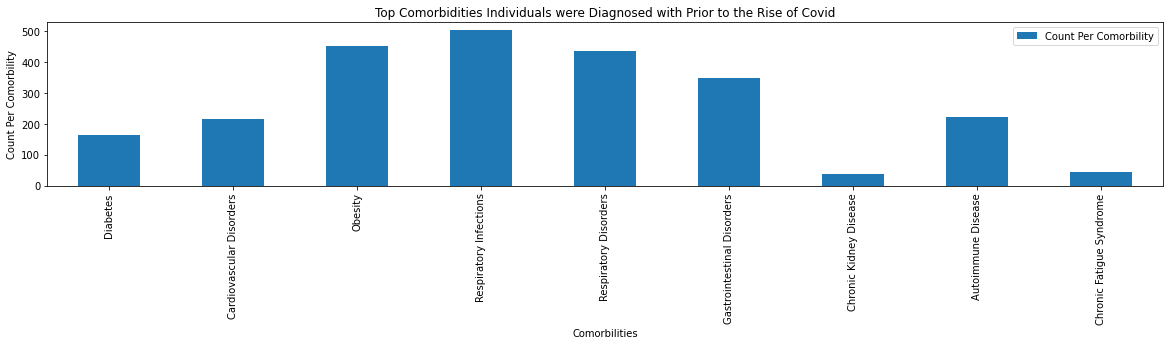

<Figure size 432x288 with 0 Axes>

In [426]:
# bar chart depicting the count per comorbility seen in above dataframe
comorbs_plot = comorbs_df.plot(kind = 'bar', figsize = (20, 3))

# Set a title for the chart
plt.title('Top Comorbidities Individuals were Diagnosed with Prior to the Rise of Covid')
plt.ylabel('Count Per Comorbility')
plt.xlabel('Comorbilities')

plt.show()
plt.tight_layout()

<ipython-input-484-5e6d6adbfbfc>:47: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(values, loc = 'lower left', labels=labels, prop={"size":20})


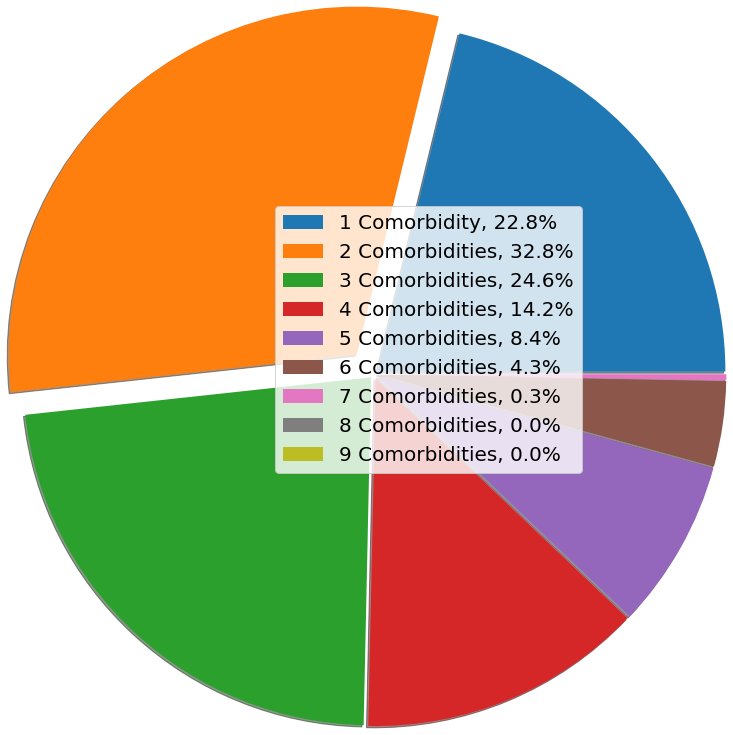

<Figure size 432x288 with 0 Axes>

In [484]:
# pie chart comparing percentages of individuals with pre-existing medical conditions (who had 1 medical condition, 2
# medical conditions, etc.)

# sum rows for columns containing medical conditions
medConditions_list = ['diabetes', 'cardiovascular_disorders', 'obesity',
                      'respiratory_infections', 'respiratory_disorders_exam', 
                      'gastrointestinal_disorders', 'chronic_kidney_disease', 
                      'autoimmune_disease', 'chronic_fatigue_syndrome_a']

top_comorbs_df['results'] = top_comorbs_df[medConditions_list].where(top_comorbs_df == 1).sum(axis = 1, skipna = True)
clean_top_comorbs_df = top_comorbs_df.dropna()

oneMedicalCondition = round((clean_top_comorbs_df['results'].where(clean_top_comorbs_df['results'] == 1).sum()/preexisting_count)*100, 2)
twoMedicalConditions = round((clean_top_comorbs_df['results'].where(clean_top_comorbs_df['results'] == 2).sum()/preexisting_count)*100, 2)
threeMedicalConditions = round((clean_top_comorbs_df['results'].where(clean_top_comorbs_df['results'] == 3).sum()/preexisting_count)*100, 2)
fourMedicalConditions = round((clean_top_comorbs_df['results'].where(clean_top_comorbs_df['results'] == 4).sum()/preexisting_count)*100, 2)
fiveMedicalConditions = round((clean_top_comorbs_df['results'].where(clean_top_comorbs_df['results'] == 5).sum()/preexisting_count)*100, 2)
sixMedicalConditions = round((clean_top_comorbs_df['results'].where(clean_top_comorbs_df['results'] == 6).sum()/preexisting_count)*100, 2)
sevenMedicalConditions = round((clean_top_comorbs_df['results'].where(clean_top_comorbs_df['results'] == 7).sum()/preexisting_count)*100, 2)
eightMedicalConditions = round((clean_top_comorbs_df['results'].where(clean_top_comorbs_df['results'] == 8).sum()/preexisting_count)*100, 2)
nineMedicalConditions = round((clean_top_comorbs_df['results'].where(clean_top_comorbs_df['results'] == 9).sum()/preexisting_count)*100, 2)

medicalConditions_dict = {
    '1 Comorbidity': oneMedicalCondition,
    '2 Comorbidities': twoMedicalConditions,
    '3 Comorbidities': threeMedicalConditions,
    '4 Comorbidities': fourMedicalConditions,
    '5 Comorbidities': fiveMedicalConditions,
    '6 Comorbidities': sixMedicalConditions,
    '7 Comorbidities': sevenMedicalConditions,
    '8 Comorbidities': eightMedicalConditions,
    '9 Comorbidities': nineMedicalConditions
}

# Get the Keys and store them in a list
labels = list(medicalConditions_dict.keys())

# Get the Values and store them in a list
values = list(medicalConditions_dict.values())

labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, values)]

explode = (0.05, 0.3, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(values, explode = explode, radius = 4, shadow = True, 
        textprops={'fontsize': 14})
plt.legend(values, loc = 'lower left', labels=labels, prop={"size":20})
plt.show()
plt.tight_layout()

<ipython-input-483-055fd90196b9>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(values, loc = 'upper right', labels=labels, prop={"size":14})


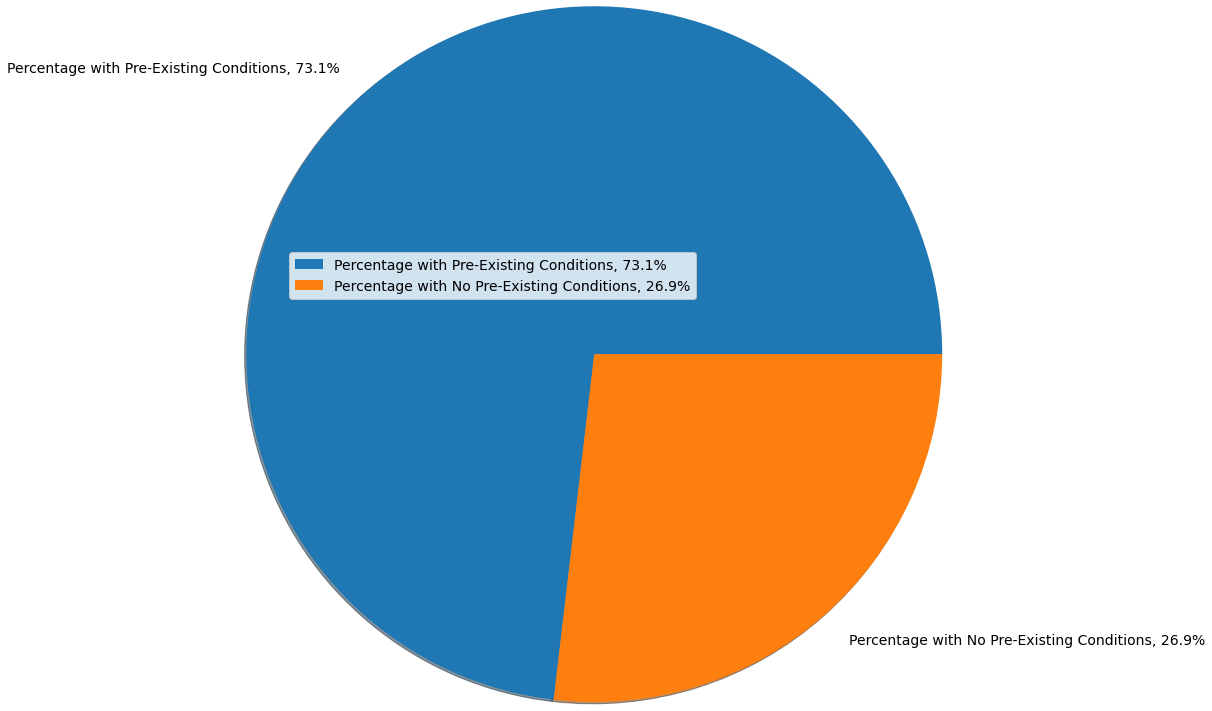

<Figure size 432x288 with 0 Axes>

In [483]:
# pie chart comparing individuals with pre-existing conditions and individuals with no pre-existing conditions

# find total number of participants by adding dataframes together and adding a new column to hold # of total participants
total_count_df = preexisting_count_df.add(nonexisting_count_df, fill_value = 0)
new_total_count_df = preexisting_count + nonexisting_count

preexisting_percent = round((preexisting_count/new_total_count_df)*100, 2)
nonexisting_percent = round((nonexisting_count/new_total_count_df)*100, 2)

participant_analysis_dict = {
    'Percentage with Pre-Existing Conditions': preexisting_percent,
    'Percentage with No Pre-Existing Conditions': nonexisting_percent
}

# Get the Keys and store them in a list
labels = list(participant_analysis_dict.keys())

# Get the Values and store them in a list
values = list(participant_analysis_dict.values())

labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, values)]

plt.pie(values, labels = labels, radius = 4, shadow = True, textprops={'fontsize': 14})
plt.legend(values, loc = 'upper right', labels=labels, prop={"size":14})

plt.show()
plt.tight_layout()

In [401]:
# individuals with top comorbidities listed in csv with pre-existing conditions that had a SOCIAL lifestyle change

social_changes = preexisting_data.loc[:, ['social_changes___1', 'social_changes___2',
                                             'social_changes___3']]

social_change1_count = social_changes['social_changes___1'].where(social_changes['social_changes___1'] == 1).sum()
social_change2_count = social_changes['social_changes___2'].where(social_changes['social_changes___2'] == 1).sum()
social_change3_count = social_changes['social_changes___3'].where(social_changes['social_changes___3'] == 1).sum()

social_change1_percent = round((social_change1_count/preexisting_count)*100, 2)
social_change2_percent = round((social_change2_count/preexisting_count)*100, 2)
social_change3_percent = round((social_change3_count/preexisting_count)*100, 2)

social_changes_count_dict = {
    'Social Change Made: Checking up on family / friends': social_change1_count,
    'Social Change Made: Revival of long lost connections with family / friends': social_change2_count,
    'Social Change Made: Other': social_change3_count
}

social_changes_percent_dict = {
    'Social Change Made: Checking up on family / friends': social_change1_percent,
    'Social Change Made: Revival of long lost connections with family / friends': social_change2_percent,
    'Social Change Made: Other': social_change3_percent
}

social_changes_df = pd.DataFrame({
    'Total Count': social_changes_count_dict,
    'Percentage of Total Population with Pre-Existing Medical Conditions': social_changes_percent_dict
})

social_changes_df['Percentage of Total Population with Pre-Existing Medical Conditions'] = \
social_changes_df['Percentage of Total Population with Pre-Existing Medical Conditions'].map('{:.2f}%'.format)

social_changes_df

,Total Count,Percentage of Total Population with Pre-Existing Medical Conditions
Social Change Made: Checking up on family / friends,1619.0,71.89%
Social Change Made: Revival of long lost connections with family / friends,511.0,22.69%
Social Change Made: Other,359.0,15.94%


<ipython-input-482-ff815870d162>:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(values, loc = 'lower left', labels=labels, prop={"size":20})


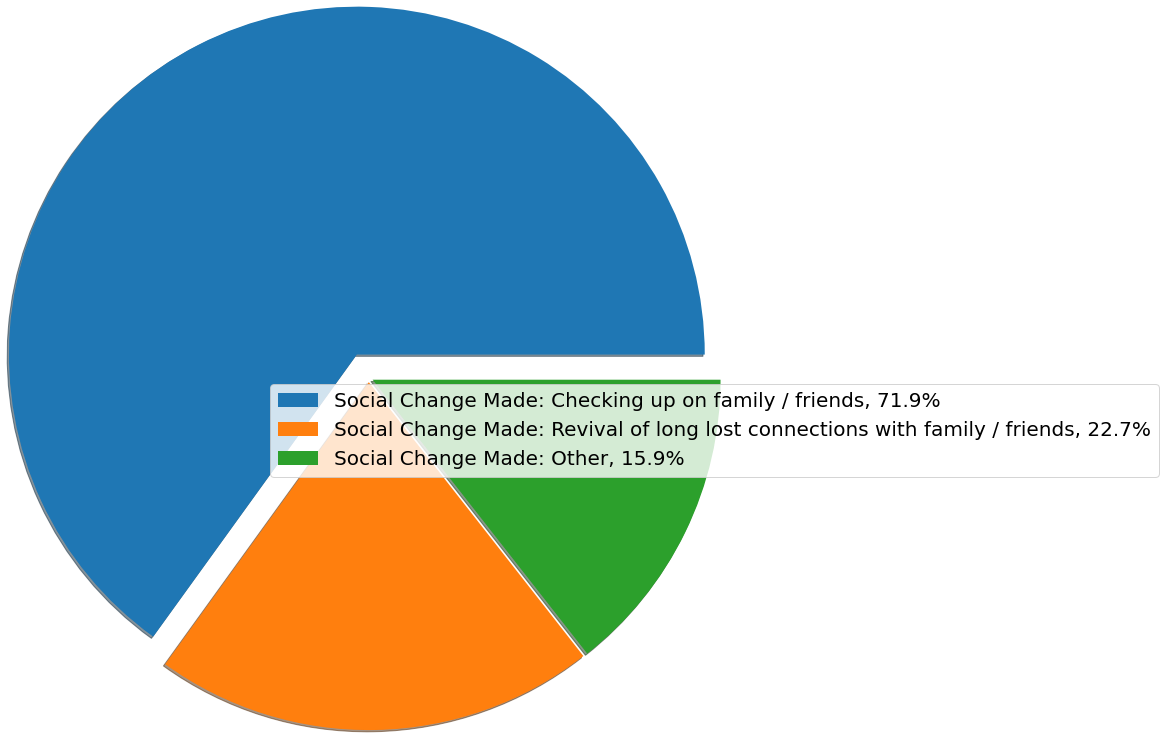

<Figure size 432x288 with 0 Axes>

In [482]:
# pie chart depicting the count per social change seen in above dataframe

# Get the Keys and store them in a list
labels = list(social_changes_percent_dict.keys())

# Get the Values and store them in a list
values = list(social_changes_percent_dict.values())

labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, values)]

explode = (0.3, 0.05, 0.05)

plt.pie(values, explode = explode, radius = 4, shadow = True, 
        textprops={'fontsize': 14})
plt.legend(values, loc = 'lower left', labels=labels, prop={"size":20})
plt.show()
plt.tight_layout()

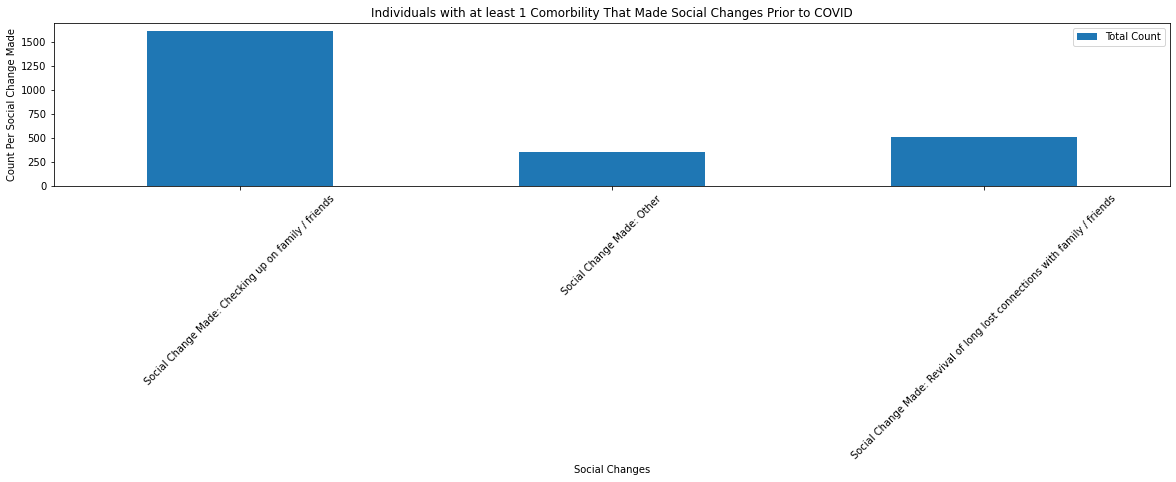

<Figure size 432x288 with 0 Axes>

In [477]:
# bar chart depicting the count per social change seen in above dataframe
social_chngs_plot = social_changes_df.plot(kind = 'bar', figsize = (20, 3))

# Set a title for the chart
plt.title('Individuals with at least 1 Comorbility That Made Social Changes Prior to COVID')
plt.ylabel('Count Per Social Change Made')
plt.xlabel('Social Changes')
plt.xticks(rotation=45)

plt.show()
plt.tight_layout()

In [455]:
# individuals with top comorbidities listed in csv with pre-existing conditions that had a PHYSICAL lifestyle change

physical_changes = preexisting_data.loc[:, ['covid_exercise']]

physical_change1_count = preexisting_data['covid_exercise'].where(preexisting_data['covid_exercise'] == 1).sum()
physical_change2_count = physical_changes['covid_exercise'].where(physical_changes['covid_exercise'] == 2).sum()
physical_change3_count = physical_changes['covid_exercise'].where(physical_changes['covid_exercise'] == 3).sum()
physical_change4_count = physical_changes['covid_exercise'].where(physical_changes['covid_exercise'] == 4).sum()
physical_change5_count = physical_changes['covid_exercise'].where(physical_changes['covid_exercise'] == 5).sum()

physical_change1_percent = round((physical_change1_count/preexisting_count)*100, 2)
physical_change2_percent = round((physical_change2_count/preexisting_count)*100, 2)
physical_change3_percent = round((physical_change3_count/preexisting_count)*100, 2)
physical_change4_percent = round((physical_change4_count/preexisting_count)*100, 2)
physical_change5_percent = round((physical_change5_count/preexisting_count)*100, 2)


physical_changes_count_dict = {
    'More than 4 times a week': physical_change1_count,
    'Between 3-4 times a week': physical_change2_count,
    'Between 1-2 times a week': physical_change3_count,
    'Between 2-4 times a month': physical_change4_count,
    'Rarely (less than once a month)': physical_change5_count
}

physical_changes_percent_dict = {
    'More than 4 times a week': physical_change1_percent,
    'Between 3-4 times a week': physical_change2_percent,
    'Between 1-2 times a week': physical_change3_percent,
    'Between 2-4 times a month': physical_change4_percent,
    'Rarely (less than once a month)': physical_change5_percent
}

physical_changes_df = pd.DataFrame({
    'Total Count': physical_changes_count_dict,
    'Percentage of Total Population with Pre-Existing Medical Conditions': physical_changes_percent_dict
})

physical_changes_df['Percentage of Total Population with Pre-Existing Medical Conditions'] = \
physical_changes_df['Percentage of Total Population with Pre-Existing Medical Conditions'].map('{:.2f}%'.format)

physical_changes_df

,Total Count,Percentage of Total Population with Pre-Existing Medical Conditions
More than 4 times a week,681.0,30.24%
Between 3-4 times a week,890.0,39.52%
Between 1-2 times a week,1350.0,59.95%
Between 2-4 times a month,756.0,33.57%
Rarely (less than once a month),1285.0,57.06%


<ipython-input-481-7fe63b6480d6>:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(values, loc = 'lower left', labels=labels, prop={"size":20})


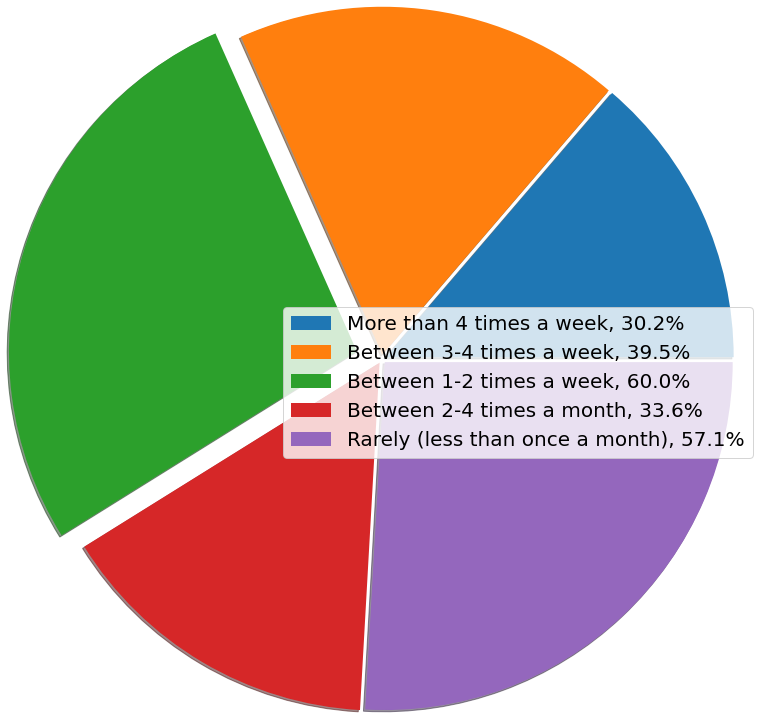

<Figure size 432x288 with 0 Axes>

In [481]:
# bar chart depicting the count per social change seen in above dataframe

# Get the Keys and store them in a list
labels = list(physical_changes_percent_dict.keys())

# Get the Values and store them in a list
values = list(physical_changes_percent_dict.values())

labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, values)]

explode = (0.05, 0.05, 0.3, 0.05, 0.05)

plt.pie(values, explode = explode, radius = 4, shadow = True, 
        textprops={'fontsize': 14})
plt.legend(values, loc = 'lower left', labels=labels, prop={"size":20})
plt.show()
plt.tight_layout()

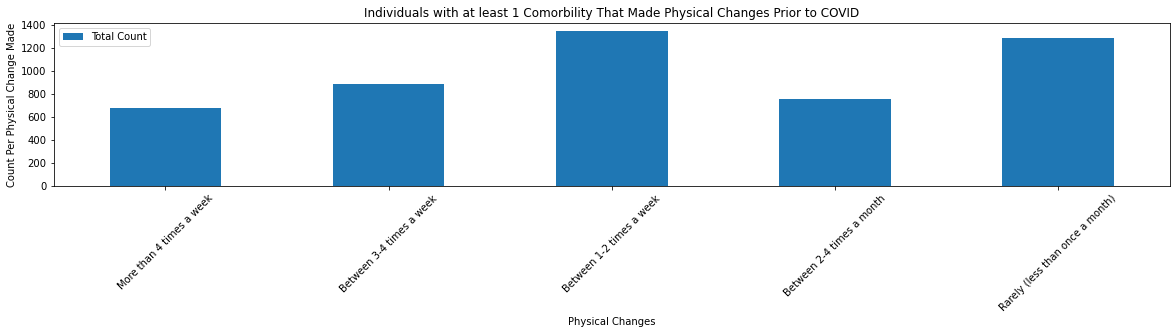

<Figure size 432x288 with 0 Axes>

In [478]:
# bar chart depicting the count per physical change seen in above dataframe
physical_chngs_plot = physical_changes_df.plot(kind = 'bar', figsize = (20, 3))

# Set a title for the chart
plt.title('Individuals with at least 1 Comorbility That Made Physical Changes Prior to COVID')
plt.ylabel('Count Per Physical Change Made')
plt.xlabel('Physical Changes')
plt.xticks(rotation=45)

plt.show()
plt.tight_layout()